**Kelompok 2 RPP**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/btc_2015_2024.csv')
data = df.filter(['close'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
date,,,,,,,,,,,,,,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650.0,100.000000,100.000000,-66.666667,-66.666667,314.640503,314.648333,314.640503,314.644418,0.017568,314.640503,2.273987,4.193073,4.275997,281.082001
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400.0,1.938583,2.096744,-100.000000,-100.000000,303.454336,303.009081,303.454336,303.232458,-1.030403,303.454336,34.067993,15.719617,14.951008,264.195007
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100.0,1.235506,1.375421,-110.693896,-110.693896,293.639503,292.715747,293.639503,293.178382,-2.091487,293.639503,29.618011,20.033779,19.034849,274.473999
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800.0,21.462825,19.523695,-76.487357,-76.487357,289.806403,288.769813,289.806403,289.286389,-2.215008,289.806403,14.145996,18.468441,17.907070,286.188995
2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700.0,38.272356,34.350787,-37.070244,-37.070244,289.203501,288.295540,289.203501,288.744005,-1.746686,289.203501,14.856995,17.613461,17.300126,294.337006


In [ ]:
dataset = data.values

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_ratio = 0.8
training_data_len = int(np.round(train_ratio*len(dataset)))

In [ ]:
lookback = 300
x_train, y_train = [], []

for i in range(lookback, len(scaled_data)):
  x_train.append(scaled_data[i-lookback:i, 0])
  y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, batch_size=32, epochs = 15, validation_split=0.2)

Epoch 1/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 31s 357ms/step - loss: 0.0222 - val_loss: 8.3109e-04
Epoch 2/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step - loss: 7.3929e-04 - val_loss: 7.6116e-04
Epoch 3/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 266ms/step - loss: 6.6366e-04 - val_loss: 8.8932e-04
Epoch 4/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 42s 277ms/step - loss: 6.2697e-04 - val_loss: 6.9437e-04
Epoch 5/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - loss: 5.1633e-04 - val_loss: 5.5251e-04
Epoch 6/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - loss: 4.6856e-04 - val_loss: 0.0012
Epoch 7/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - loss: 4.9998e-04 - val_loss: 6.7505e-04
Epoch 8/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - loss: 4.3888e-04 - val_loss: 7.6016e-04
Epoch 9/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 263ms/step - loss: 4.3518e-04 - val_loss: 4.7889e-04
Epoch 10/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 255ms/step - loss: 3.6861e-04 - val_loss: 5.1644e-04
Epoch 11/15
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - l

In [ ]:
test_data = scaled_data[training_data_len - lookback:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(lookback, len(test_data)):
  x_test.append(test_data[i-lookback:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
mae = np.mean(np.abs(predictions - y_test))
mape = np.mean(np.abs((predictions - y_test)/y_test))*100

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
RMSE: 25.24214742657855
MAE: 841.2948386901616
MAPE: 2.6870523870367515


<ipython-input-11-e16237a46faf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


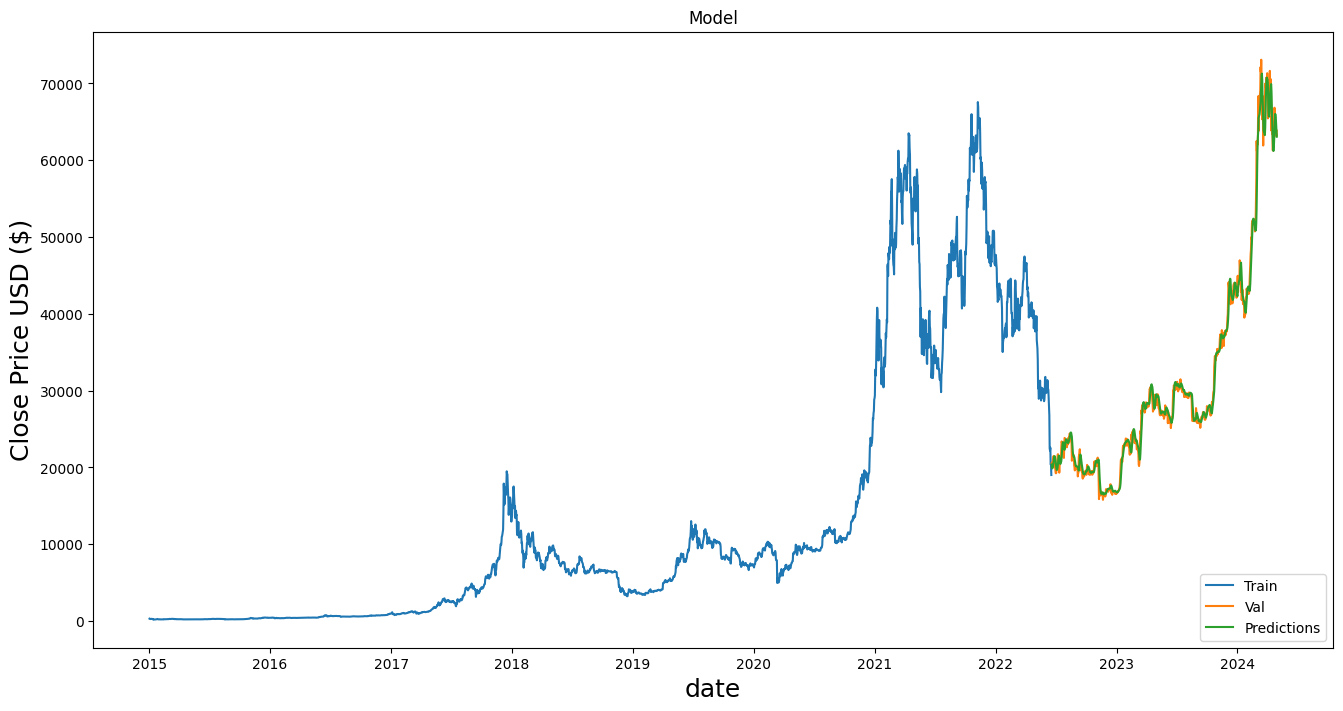

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train.index, train['close'])
plt.plot(valid.index, valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

# SISTEM PAKAR

In [ ]:
model.save("bitcoin_prediction_model.h5")

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Fungsi prediksi
def predict_bitcoin_price(model_path, scaler, data, lookback=300):
    # Load model
    model = tf.keras.models.load_model(model_path)

    # Skalakan data input
    scaled_data = scaler.transform(data)

    # Siapkan data untuk prediksi
    x_input = []
    for i in range(lookback, len(scaled_data)):
        x_input.append(scaled_data[i-lookback:i, 0])

    x_input = np.array(x_input)
    x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))

    # Prediksi
    predictions = model.predict(x_input)
    predictions = scaler.inverse_transform(predictions)
    return predictions

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np

# Load model dan scaler
model_path = "bitcoin_prediction_model.h5"
model = tf.keras.models.load_model(model_path)

# Fungsi prediksi
def predict_prices(data, lookback=300):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    x_input = []
    for i in range(lookback, len(scaled_data)):
        x_input.append(scaled_data[i-lookback:i, 0])

    x_input = np.array(x_input)
    x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))

    predictions = model.predict(x_input)
    return scaler.inverse_transform(predictions)

# Streamlit App
st.title("Bitcoin Price Prediction Expert System")
st.write("Upload a CSV file containing Bitcoin closing prices.")

uploaded_file = st.file_uploader("Choose a file", type=["csv"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    st.write("Dataset Preview:")
    st.write(df.head())

    # Prediksi
    st.write("Processing predictions...")
    predictions = predict_prices(df.filter(['close']).values)
    df['Predicted Prices'] = None
    df['Predicted Prices'][-len(predictions):] = predictions.flatten()

    st.write("Predictions:")
    st.line_chart(df[['close', 'Predicted Prices']])

2024-12-02 14:58:51.958 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:58:52.895 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-02 14:58:52.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:58:52.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:58:52.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:58:52.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:58:52.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 14:58:52.919 Thread 'MainThread': mi

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
